<a href="https://www.kaggle.com/code/serdargundogdu/aggregate-and-merge-data-with-pandas?scriptVersionId=111257067" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lego-database/inventories.csv
/kaggle/input/lego-database/themes.csv
/kaggle/input/lego-database/inventory_sets.csv
/kaggle/input/lego-database/parts.csv
/kaggle/input/lego-database/part_categories.csv
/kaggle/input/lego-database/colors.csv
/kaggle/input/lego-database/downloads_schema.png
/kaggle/input/lego-database/sets.csv
/kaggle/input/lego-database/inventory_parts.csv


# Learn to Aggregate and Merge Data in Pandas while Analysing a Dataset of LEGO Pieces

We're going to be diving deep into a dataset all about LEGO, which will help us answer a whole bunch of interesting questions about the history of the company, their product offering, and which LEGO set rules them all:

* What is the most enormous LEGO set ever created and how many parts did it have?

* In which year were the first LEGO sets released and how many sets did the company sell when it first launched?

* Which LEGO theme has the most sets? Is it Harry Potter, Ninjago, Friends or something else?

* When did the LEGO company really take-off based on its product offering? How many themes and sets did it release every year?

* Did LEGO sets grow in size and complexity over time? Do older LEGO sets tend to have more or fewer parts than newer sets?


What you'll learn


* How to combine a Notebook with HTML Markup.

* Apply Python List slicing techniques to Pandas DataFrames.

* How to aggregate data using the .agg() function.

* How to create scatter plots, bar charts, and line charts with two axes in Matplotlib.

* Understand database schemas that are organised by primary and foreign keys.

* How to merge DataFrames that share a common key

# Use HTML Markdown to Make Your Notebook Look Pretty

The cells inside the notebook can either be code cells for your Python code or Text (Markdown) cells. The starter notebook includes a few of these Text cells with section headings and challenge text. However, we can style these cells even more by using HTML

**Insert a Markdown Cell**

Add a new Text cell below the Introduction.

**Adding Images**

Display an image in a Text cell, use an HTML `<img>` tag with the URL of the image. For example:

<img src="https://i.imgur.com/49FNOHj.jpg">

If you are using Jupyter Notebook instead of Google Colab, you can also link to one of the files provided in the .zip like so:

`<img src="assets/bricks.jpg">`

**Section Headings**

You can add section headings using tags like `<h1>` or `<h2>`. However, the Notebook also has its own shorthand for common HTML tags. For example, you can use the # symbol as a shortcut. Here's how the headings change their size up to a minimum of `<h5>`:

**Challenge**


Now, let's get warmed up and write some Python code. Let's find out how many different colour LEGO bricks are actually in production!

Read the colors.csv file from the data folder and find the total number of unique colours.

There's a number of different ways you can accomplish this. Maybe try using the `.nunique()` from Pandas this time.

Also, figure out how many of the LEGO colours are transparent compared to how many colours are opaque. See if you can Google your way to finding at least two different ways of arriving at the answer.

# Exploring The Lego Bricks Colours

**Import Statements**

**Import Pandas**

In [2]:
import pandas as pd

**Examine the Structure**

From there we can read the .csv file and take a look at the first 5 rows.

In [3]:
colors = pd.read_csv('../input/lego-database/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


We see that there are 5 columns, which include the name of the colour and its corresponding RGB value. To find the number of unique colours, all we need to do is check if every entry in the `name` column is unique: 

In [4]:
colors['name'].nunique()

135

This shows us that there are 135 unique colours for LEGO blocks.

**Find the number of transparent colours**

One way you can do this is through combining our old friend, the .groupby() method, with the .count() method.

In [5]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


Here we just group by the `is_trans` column and count the entries.

But you might have also come across the very handy `.value_counts()` method in your research.

In [6]:
colors.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

Once again, we select the column (here with the .dot notation) and call the method. The `.value_counts()` method is a very quick way of finding the number of members of each category.

**Challenge**

Do you remember how to work with section headings and images? See if you can tackle the next couple of challenges to make your notebook look like this:

# Find the Oldest and Largest LEGO Sets

**Markdown Challenge Solution**

Here's how you'd organise the markdown cells with the section headings and image tags. You might have also spotted that enclosing text in the double-asterisk ** symbol will make it bold.

**Exploring the sets.csv**

The sets.csv contains a list of LEGO sets. It shows in which year the set was released and the number of parts in the set.

Can you take the first steps in exploring this dataset? Read the .csv and take a look at the columns.

Then try and answer the following questions:

* In which year were the first LEGO sets released and what were these sets called?

* How many different products did the LEGO company sell in their first year of operation?

* What are the top 5 LEGO sets with the most number of parts? 

**Solution**

The first step as always is reading the .csv file and looking what's in it. We see that there's some sort of id for each set (the set_num), the name of the set, the year in which it was released, the theme_id (the code for the theme name) and the number of parts.

So it looks like we have everything we here to answer our two questions.

In [7]:
sets = pd.read_csv("../input/lego-database/sets.csv")
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [8]:
sets.tail()

,set_num,name,year,theme_id,num_parts
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15
11669,WHITEHOUSE-1,Micro White House,2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11671,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28
11672,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,3


To find the year when the first LEGO sets were released we have to sort by the year column. The `.sort_values()` method will by default sort in ascending order.

In [9]:
sets.sort_values("year").head()

,set_num,name,year,theme_id,num_parts
6935,700.1.1-1,Individual 2 x 4 Bricks,1950,371,10
6938,700.1.2-1,Individual 2 x 2 Bricks,1950,371,9
6956,700.B.1-1,Individual 1 x 4 x 2 Window (without glass),1950,371,7
6957,700.B.2-1,Individual 1 x 2 x 3 Window (without glass),1950,371,7
6959,700.B.4-1,Individual 1 x 2 x 4 Door (without glass),1950,371,7


Looks like LEGO started all the way back in 1950! 😮 The names for these sets are nothing to write home about, but let's find out how many different products the company was selling in their first year since launch:

In [10]:
sets[sets["year"] == 1950]

,set_num,name,year,theme_id,num_parts
6935,700.1.1-1,Individual 2 x 4 Bricks,1950,371,10
6938,700.1.2-1,Individual 2 x 2 Bricks,1950,371,9
6954,700.A-1,Automatic Binding Bricks Small Brick Set (Lego...,1950,366,24
6956,700.B.1-1,Individual 1 x 4 x 2 Window (without glass),1950,371,7
6957,700.B.2-1,Individual 1 x 2 x 3 Window (without glass),1950,371,7
6958,700.B.3-1,Individual 1 x 2 x 2 Window (without glass),1950,371,7
6959,700.B.4-1,Individual 1 x 2 x 4 Door (without glass),1950,371,7


Back in 1950, LEGO got started selling only 7 different sets! Note that here we are filtering our DataFrame on a condition. We are retrieving the rows where the year column has the value 1950: `sets['year'] == 1950`.

Now let's find the LEGO set with the largest number of parts. If we want to find the largest number of parts, then we have to set the `ascending `argument to `False` when we sort by the num_parts column.

In [11]:
sets.sort_values("num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts
170,10189-1,Taj Mahal,2008,276,5922
11614,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,169,5461
1337,2000409-1,Window Exploration Bag,2010,507,5200
161,10179-1,Millennium Falcon - UCS,2007,174,5195
8322,75827-1,Firehouse Headquarters,2016,301,4640


The largest LEGO set ever produced has around 6,000 pieces!

# Visualise The Number of Sets Published Over Time

Now let's take a look at how many sets the LEGO company has published year-on-year. This might tell us something about how LEGO's product offering has changed over time.

First, let's import Matplotlib so we can visualise our findings up top:

**Import Statements**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

**Challenge**

Now, let's create a new Series called `sets_by_year` which has the years as the index and the number of sets as the value.

The trick is grouping the data by the year and counting the number of entries for that year.

In [13]:
sets_by_year = sets.groupby("year").count()
sets_by_year["set_num"].head()

year
1950     7
1953     4
1954    14
1955    28
1956    12
Name: set_num, dtype: int64

In [14]:
sets_by_year["set_num"].tail()

year
2013    593
2014    713
2015    665
2016    596
2017    296
Name: set_num, dtype: int64

From this, we can see that LEGO published less than 10 different sets per year during its first few years of operation. But by 2014 the company had grown spectacularly, releasing 713 sets in that year alone!

You also notice that there is an entry for 2017. The .csv file is from late 2017, so it appears that it already includes some sets on a forward-looking basis. We'll have to take this into account for our charts:

Having summed the number of LEGO sets per year, visualise this data using a line chart with Matplotlib. You should get something like this:

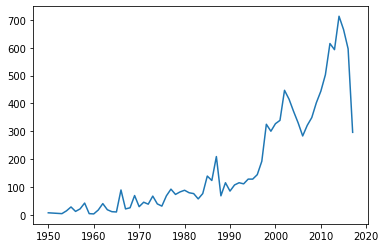

In [15]:
plt.plot(sets_by_year.index, sets_by_year.set_num)

Because the .csv file is from late 2017, to plot the full calendar years, you will have to exclude some data from your chart. Use the slicing techniques  to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

If we don't exclude the last two years we get a dramatic drop at the end of the chart. This is quite misleading as it suggests LEGO is in big trouble! Given the dataset does not include a full calendar year for 2017, it's best to exclude the last two rows to get a better picture:

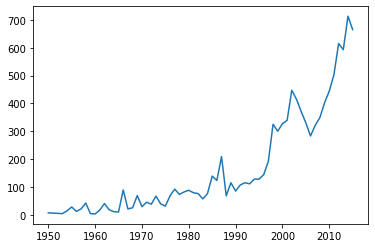

In [16]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

We also see that while the first 45 years or so, LEGO had some steady growth in its product offering, but it was really in the mid-1990s that the number of sets produced by the company increased dramatically! We also see a brief decline in the early 2000s and a strong recovery around 2005 in the chart.

# How To Use Pandas `.agg()` Function 

Often you find yourself needing to summarise data. This is where the `.groupby()` function comes in really handy. However, sometimes you want to run even more operations based on a particular DataFrame column. This is where the `.agg()` method comes in.

In our case, we want to calculate the number of different themes by calendar year. This means we have to group the data by year and then count the number of unique theme_ids for that year.

**Number of Themes per Calendar Year**

We can accomplish this by chaining the `.groupby()` and the `.agg()` functions together:

In [17]:
themes_by_year = sets.groupby("year").agg({"theme_id": pd.Series.nunique})

Note, the `.agg()` method takes a dictionary as an argument. In this dictionary, we specify which operation we'd like to apply to each column. In our case, we just want to calculate the number of unique entries in the theme_id column by using our old friend, the `.nunique()` method.

Let's give our column in `themes_by_year` a more appropriate name and let's take a look at what we've got:

In [18]:
themes_by_year.rename(columns={"theme_id":"nr_themes"}, inplace=True)
themes_by_year.head()

,nr_themes
year,
1950,2
1953,1
1954,2
1955,4
1956,3


In [19]:
themes_by_year.tail()

,nr_themes
year,
2013,93
2014,92
2015,98
2016,86
2017,57


Here we can see that LEGO only had 2 themes during the first few years, but just like the number of sets the number of themes expanded manifold over the years. Let's plot this on a chart again.

**Challenge**


Create a line plot of the number of themes released year-on-year. Only include the full calendar years in the dataset (1950 to 2017).

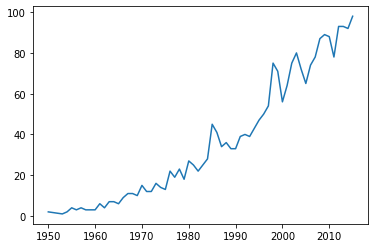

In [20]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

Again, we're using the same slicing technique as before. In the chart, we can see that LEGO has pretty consistently added more and more themes until the mid-1990s. From then the number of themes has stagnated for around 10 years or so until the early 2010s.

# Superimposing Line Charts with Seperated Axes

Wouldn't it be nice to have the number of themes and the number sets on the same chart? But what do we get if we just plot both of them the way we have before? 

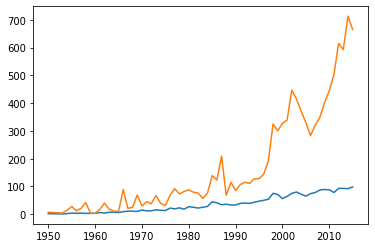

In [21]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

Well, that's not very informative! 🤦‍♀️ The problem is that the "number of themes" and the "number of sets" have very different scales. The theme number ranges between 0 and 90, while the number of sets ranges between 0 and 900. So what can we do?

**Two Separate Axes**

We need to be able to configure and plot our data on two separate axes on the same chart. This involves getting hold of an axis object from Matplotlib.

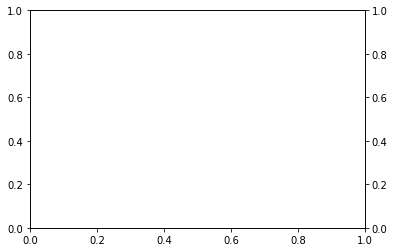

In [22]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

We then create another axis object: `ax2`. The key thing is that by using the `.twinx()` method allows `ax1` and `ax2` to share the same x-axis. When we plot our data on the axes objects we get this:

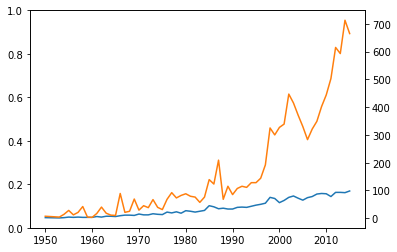

In [23]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

That's very nice! But there's one problem: we can't tell the lines apart because they have the same colour! Let's add some styling. Let's:

* colour in the lines

* colour in the axes and

* add some labels

so that we can see what's going on. Here's what we get:

Text(0, 0.5, 'Number of Themes')

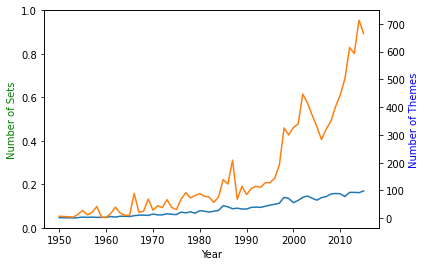

In [24]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Sets", color="green")
ax2.set_ylabel("Number of Themes", color="blue")

# Scatter Plots: Average Number of Parts per LEGO Set

**Complexity Over Time**

Have LEGO sets become larger and more complex over time? Let's work out the average number of parts per LEGO set. This is the perfect time to revise how to use the `.agg()` function.



**Challenge**


Create a Pandas Series called `parts_per_set` that has the year as the index and contains the average number of parts per LEGO set in that year. Here's what you're looking to create:

Once again, we're going to use the `.groupby()` and the `.agg()` function together to work this one out. However, this time we pass a dictionary to the `.agg()` function so that we will target the num_parts column with the `mean()` function. That way, we group our data by year and then we average the number of parts for that year.

In [25]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})

To visualise our parts_per_set data, let's create a scatter plot. A scatter plot simply uses dots to represent the values of each data point.

**Challenge**

See if you can use the Matplotlib documentation to generate the scatter plot chart. Do you spot a trend in the chart? Again, you'll have to exclude the last two observations.



We just need to call the `.scatter()` instead of the `.plot()` method to create the chart. For the x-values, we'll use the index of the `parts_per_set` Series (the years) and for the y-values, we'll use the values of the series (the column name happens to be `num_parts`).

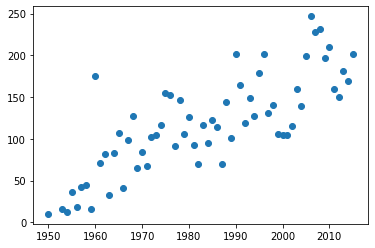

In [26]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

From the chart, we can definitely make out an upward trend in the size and complexity of the LEGO sets based on the average number of parts. In the 2010s the average set contained around 200 individual pieces, which is roughly double what average LEGO set used to contain in the 1960s.



# Relational Database Schemas: Primary and Foreign Key

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? Is it one of LEGO's own themes like Ninjago or Technic or is it a third party theme? Let's analyse LEGO's product lines in more detail!

Number of Sets per LEGO Theme

To count the number of sets per Theme we can use the `.value_counts()` method on our `theme_id` column. But there's one problem:

In [27]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]

501    246
371    240
504    219
220    216
494    192
Name: theme_id, dtype: int64

We have no idea what our themes are actually called! 🤨 Ok, we can see that the theme with id 158 is the largest theme containing 753 individual sets, but what's that theme called? This is not very helpful. We need to find the names of the themes based on the `theme_id `from the `themes.csv` file.

**Mini-Challenge**

Display the database schema (link: https://i.imgur.com/Sg4lcjx.png) inside the Notebook. You should see something like this:

To display an image in a Text (aka Markdown) cell, all you need to do is use the HTML `<img> `tag.

<img src="https://i.imgur.com/Sg4lcjx.png">

**Working with a Relational Database**

What is a database schema? A schema is just how the database is organised. Many relational databases, such as our LEGO data, is split into individual tables. We have separate tables for the colours, the sets and the thems. With a relational database, the tables are linked to each other through their keys.

**Understand the theme.csv file**

The themes.csv file has the actual theme names. How is this table linked to the others tables? Well, the sets .csv has `theme_ids` which match the `id` column in the themes.csv.

This means that the `theme_id` is the **foreign key** inside the sets.csv. Many different sets can be part of the same theme. But inside the themes.csv, each `theme_id`, which is just called id is unique. This uniqueness makes the `id` column the **primary key** inside the themes.csv. To see this in action, explore the themes.csv.

**Challenge**

How is the themes.csv structured?

Search for the name 'Star Wars'. How many `id`s correspond to the 'Star Wars' name in the themes.csv?

Use the `id`s you just found and look for the corresponding sets in the sets.csv (Hint: you'll need to look for matches in the `theme_id` column).

Looking at the first 5 rows, we see the column names. Each value in the id column is unique (this is the primary key for the themes table). The theme names are not unique. If we search for the name "Star Wars", we see that 4 different ids correspond to that name.

In [28]:
themes = pd.read_csv("../input/lego-database/themes.csv")
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [29]:
themes[themes["name"] == "Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
157,158,Star Wars,NaN
208,209,Star Wars,207.0
224,225,Star Wars,217.0
260,261,Star Wars,258.0
430,431,Star Wars,425.0


Why would Star Wars have so many different themes? We can check which products corresponded to those themes in the sets.csv:

In [30]:
sets[sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
6283,65081-1,R2-D2 8009 / C-3PO 8007 Droid Collectors Set,2002,18,3
11301,K8008-1,Darth Vader / Stormtrooper Kit,2002,18,2


Star Wars is a really long-running franchise. Theme number 18 was running from 2000 to 2002 and seems to be comprised of several of the show's characters. What about, say theme 209?

In [31]:
sets[sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
7990,75023-1,"Advent Calendar 2013, Star Wars",2013,209,24
8046,75056-1,Advent Calendar 2014 Star Wars,2014,209,24
8154,75146-1,Advent Calendar 2016 Star Wars,2016,209,282
8946,7958-1,Advent Calendar 2011 Star Wars,2011,209,25
10624,9509-1,"Advent Calendar 2012, Star Wars",2012,209,25


Here we see that all of the Star Wars Advent Calendars share the same theme_id. That makes sense.

# How To Merge DataFrames and Create Bar Charts 

Wouldn't it be nice if we could combine our data on theme names with the number sets per theme? 

Let's use the `.merge()` method to combine two separate DataFrames into one. The merge method works on columns with the same name in both DataFrames.

Currently, our theme_ids and our number of sets per theme live inside a Series called `set_theme_count`.

In [32]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]

501    246
371    240
504    219
220    216
494    192
Name: theme_id, dtype: int64

To make sure we have a column with the name `id`, I'll convert this Pandas Series into a Pandas DataFrame.

In [33]:
set_theme_count = pd.DataFrame({"id" : set_theme_count.index,
                              "set_count" : set_theme_count.values})
set_theme_count.head()

,id,set_count
0,501,246
1,371,240
2,504,219
3,220,216
4,494,192


Here I'm providing a dictionary to create the DataFrame. The keys in the dictionary become my column names.

**The Pandas `.merge()` function**

To `.merge()` two DataFrame along a particular column, we need to provide our two DataFrames and then the column name on which to merge. This is why we set `on='id'`. Both our `set_theme_count` and our `themes` DataFrames have a column with this name.

In [34]:
merged_df = pd.merge(set_theme_count, themes, on="id")
merged_df[:3]

,id,set_count,name,parent_id
0,501,246,Gear,NaN
1,371,240,Supplemental,365.0
2,504,219,Duplo,NaN


Aha! Star Wars is indeed the theme with the most LEGO sets. Let's plot the top 10 themes on a chart.[](http://)

**Creating a Bar Chart**

Matplotlib can create almost any chart imaginable with very few lines of code. Using `.bar()` we can provide our theme names and the number of sets. This is what we get:

<BarContainer object of 10 artists>

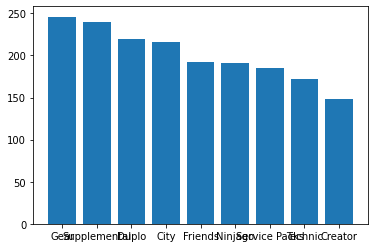

In [35]:
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

That worked, but it's almost unreadable. 😩 The good thing for us is that we already know how to customize our charts! Here's what we get when we increase the size of our figure, add some labels, and most importantly, rotate the category names on the x-axis so that they don't overlap.

<BarContainer object of 10 artists>

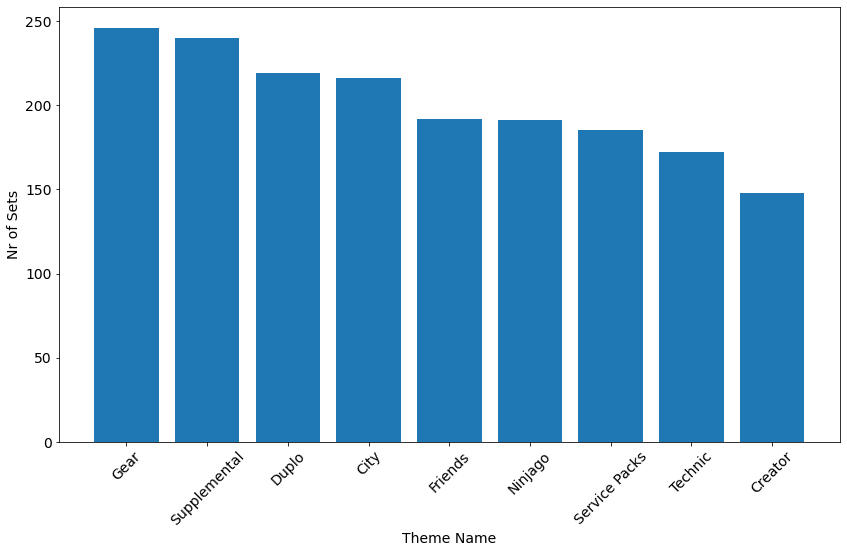

In [36]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

Niiiiice.😌 So what can we see here? Well, a couple of these themes like Star Wars, Town, or Ninjago are what I would think of when I think of LEGO. However, it looks like LEGO also produces a huge number of ... books and key chains?!?! I guess I'm showing my age here, but it's interesting that the LEGO company seems to produce so much more these days than just plastic bricks. The 'Gear' category itself is huge and includes everything from bags to pencil cases apparently. Has LEGO strayed from its core business or is it successfully diversifying? That we can't answer from our dataset. I'll leave that one up to a business school case study to decide. 🤷‍♀️

# Learning Points & Summary

In this lesson we looked at how to:

* use HTML Markdown in Notebooks, such as section headings # and how to embed images with the `<img>` tag.

* combine the `groupby()` and `count()` functions to aggregate data

* use the `.value_counts()` function

* slice DataFrames using the square bracket notation e.g., `df[:-2]` or `df[:10]`

* use the `.agg()` function to run an operation on a particular column

* `rename() `columns of DataFrames

* create a line chart with two separate axes to visualise data that have different scales.

* create a scatter plot in Matplotlib

* work with tables in a relational database by using primary and foreign keys

* `.merge()` DataFrames along a particular column

* create a bar chart with Matplotlib


I hope you found digging into LEGOs product catalogue as fascinating as I have. Have a good rest and I'll see you tomorrow! 💪